## Detecting Outliers using measures *introduced by Rousseeuw and van Zomeren (1990)*

Before we begin, we need to import essential python modules plus the MVE.py for the exercise below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./*/')
sys.path.append('./')
from MVE import MinimumVolumeEllipsoid

### 1. Introduction

<p> 
    <font size = 4> 
        Suppose that we have $X$ = $(X_1, X_2, \dots , X_p )$ is <b> multivariate normal </b>. <br>
        Then, the square of the <i> Mahalanobis distance (MD) </i> of the $i^{th}$ case or observation has the following property: <br><br>
        <center>
                <font size = 3, color = '#8f292d'>
                $MD_{i}^{2} = (X - T(X))' C(X)^{-1} (X - T(X))$ ~ $\chi_p^2$ <br></font>
                    <i> <font size = 2.5, color= 'black'> where T(X) is an estimator of the population mean and C(X) is an estimator of the true covariance </font> </i>
        </center><br><br>
        More clearly, for the module MVE, $T(X) = \bar{X}$ and $C(X) = S(X)$.<br>
        Then, we find a $i^{th}$ case or observation, given the level of significance $\alpha$, to be an <b> outlier </b> if <br><br>
        <center>
                <font size = 3, color = '#8f292d'>
                $MD_{i}^{2} = (x_i - \bar{x})' S(X)^{-1} (x_i - \bar{x})$ $\gt$ $\chi_{p, 1-\alpha}^2$ <br></font>
        </center><br><br>
        However, the sample mean and sample covariance are already vulnerable to even a single outlier when the sample size is relatively small. Therefore, we need <b> robust estimators </b> for the true mean and true covariance. Then, even if we have outliers, the estimators are no longer affected by them.
    </font>
</p>
  

### 2. Method

<p>
    <font size = 4>
        Rousseneuw and van Zomeren (1990) proposed to use <b> robust estimators </b> to the true mean and true covariance when finding outliers; and the estimator they proporsed is called <font size = 4, color = '#8f292d'> <b> <i> Minimum Volume Ellipsoid (MVE) Estimator.  </i> </b> </font> <br><br> The goal is to minimize the pair $(T(X), C(X))$ subject to <br><br>
        <center>
                <font size = 3, color = '#8f292d'>
                $\#$ $\{i: (x_i - T(x))' C(x)^{-1} (x_i - T(x)) \le \chi_{p, 0.5}^2 \} \ge h $ <br></font>
            <font size = 2> <i> where $\#$ is the cardinality of a set and $h$ is a floor of $(n + p +1)/2$
                </i></font>
        </center><br><br>
        One of the available algorithms to find the MVE is called <b> resampling algorithm </b> introduced by <i> Rousseeuw and Leroy (1987). </i> The steps for the algorithm is the following: <br><br>
        <font size = 3>
            <ol>
                <li> Draw the subsamples of $p+1$ different observations </li>
                <li> Then, find the sample mean and sample covariance of the subsample </li>
                <li> Inflate or deflate the corresponding ellipsoid to contain exactly h points </li>
                <ul> <font size = 2.5>
                    <li> $h$ = floor$(\frac{n+p+1}{2})$ </li>
                    <li> $m^2_J$ = $\{ (x_i - T_J) C_J^{-1} (x_i - T_J)' \}_{h:n}$ </li><br>
                    </font>
                </ul>
                <li> Keep the <b> smallest </b> value of <b> $m_J^{2p} \cdot $det$(C_J)$</b></li>
                <ul>
                    <li> <font size = 2.5, color = '#8f292d'> Note that the squared volume of the ellipsoid defined by the previous step is <b> proportional </b> to  $m_J^{2p} \cdot $det$(C_J)$ </font></li><br>
                </ul>
                <li>The MVE for the mean vector and the covariance matrix then are:<br><br>
                    <font color = '#8f292d'>
                        $T(X) = T_J$ <br>
                        $C(X) = (\chi_{p, 0.5}^2)^{-1} \cdot c^2_{n,p} \cdot m^2_J \cdot C_J$ 
                        <font size = 2> where $c^2_{n,p} = ( 1+ \frac{15}{n-p})^2$ </font>
                        </font></li>
            </ol>
        </font>
    </font>
</p>
    

### 3. Example 1 : Data not from the multivariate normal

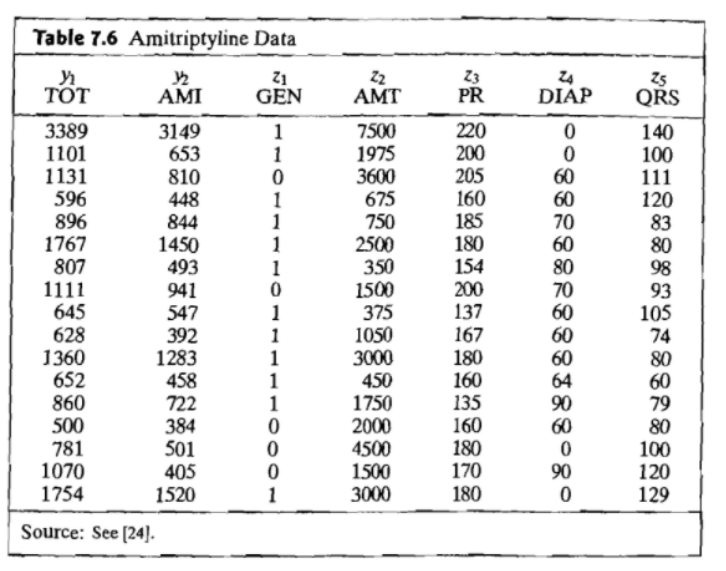
Source: page 426 of Applied Multivariate Statistical Analysis by Johnson and Wichern

In [2]:
df = pd.read_csv('T7-6.DAT',sep = '\s+', names = ['y1','y2','z1','z2','z3','z4','z5'])
df.head()

,y1,y2,z1,z2,z3,z4,z5
0,3389,3149,1,7500,220,0,140
1,1101,653,1,1975,200,0,100
2,1131,810,0,3600,205,60,111
3,596,448,1,675,160,60,120
4,896,844,1,750,185,70,83


In [3]:
# For the exercise, we use z2 to z5 because z1 is a binary variable
X = df.iloc[:, 3:]
X.head()

,z2,z3,z4,z5
0,7500,220,0,140
1,1975,200,0,100
2,3600,205,60,111
3,675,160,60,120
4,750,185,70,83


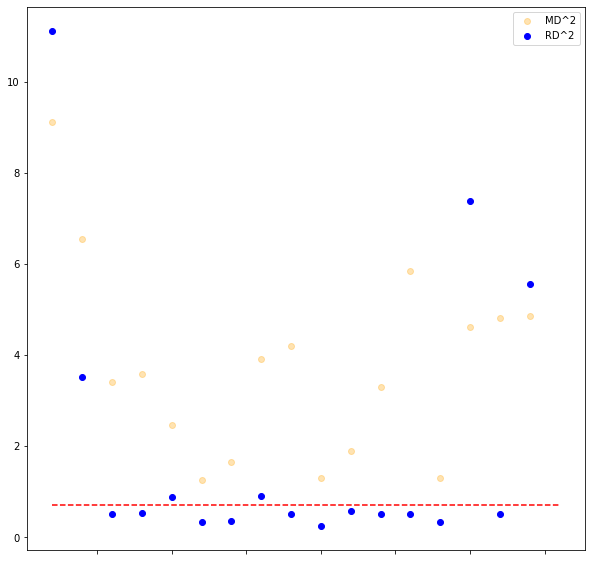

In [4]:
with MinimumVolumeEllipsoid(X, 1000, .05) as y:
    y.gen_rd()
    y.plot('plot.png')

This result shows that Robust Distance is telling us there are fewer outliers than what Mahalanobis Distance methods tells us. However, notice that we never assumed multivariate normaility of the population. We simply used the method for the wrong sample. Lesson here is that you must have some confidence that the data are sample from population that follows the multivariate normal.

### Example 2. Random Sample from multivariate normal

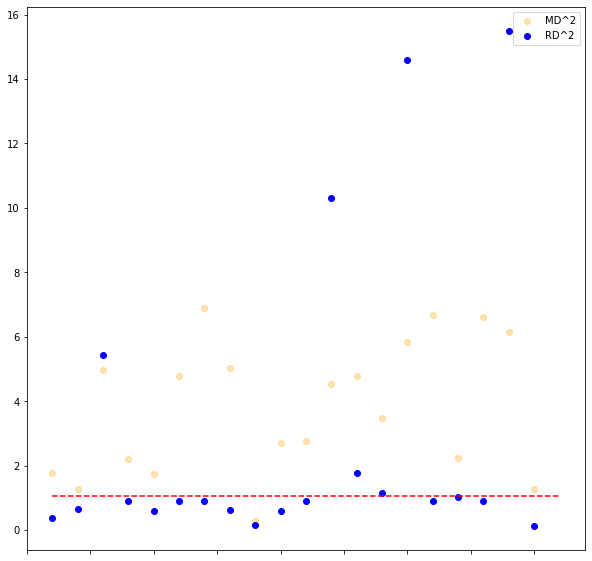

In [10]:
from sklearn.datasets import make_spd_matrix
cov = make_spd_matrix(4, random_state = 1)
sample = np.random.multivariate_normal(np.repeat(0, 4), cov, size = 20)
df = pd.DataFrame(sample)
with MinimumVolumeEllipsoid(df, 1000, .1) as z:
    z.gen_rd()
    z.plot('plot2.png')

While the Malahanobis Distance method gives us that all of the points should be considered as outliers while the robust distance (MVE) gives us that only 7 of them are outliers.